# 데이터 전처리 개요

##1.데이터 전처리 유형

데이터 전처리는 데이터 가공, 데이터 핸들링 등 다양한 이름으로 불림

###1-1.데이터 전처리 필요성

데이터를 최초로 얻을 때의 목적에 맞게 구성되어 있기 때문에, 이 데이터를 다른 목적으로 사용하기 위해 재가공

데이터가 처리하기 좋은 형식으로 되어 있는지, 데이터를 새로 가공해야 하는지 등을 파악

> 데이터 전처리 형태

1.필터링
- 필요한 데이터를 골라냄

2.변환
- 데이터의 형식 변경

3.통합
- 여러 소스에서 온 데이터 합침

###1-2.결측치 처리

> 방법

1. 결측치가 포함되어 있는 항목을 버림

2. 결측치를 적절한 값으로 대체

3. 결측치를 NaN으로 표시하여 다음의 분석단계로 처리를 넘김

###1-3.틀린 값 처리

잘못된 값이 들어있는 것을 의미

틀린 값을 처리하는 방법 또한 결측치 처리 방법과 동일

###1-4.이상치 처리

값의 범위가 일반적인 범위를 벗어나 특별한 값을 갖는 것

###1-5.데이터 변환

분석하기 좋은 형태로 바꾸는 작업

데이터 분포를 고려하여 정규화하거나 단위를 조정하거나 로그 스케일로 변환하는 것 모두 지칭

> 종류

1. 범주형으로 변환
* 수치데이터를 범주형으로 변환

2. 일반 정규화
* 분석을 정확히 하기 위해 원래 주어진 수치 값을 바로 사용하는게 타당치 않고 정규화를 해야하는 경우가 많음

3. Z-score 정규화
* 표준 편차를 고려해 데이터  변환
* 평균을 0점으로, 표준 편차를 1점으로 환산하는 변환

4. 로그 변환
* 어떤 수치 값을 그대로 사용하지 않고 여기에 로그를 취한 값을 사용하는 것
* 로그를 취하면 그 분포가 정규분포에 가깝게 변환되는 경우가 있는데, 이런 분포를 로그 정규분포를 가진다고 함
* ex) 국가별 수출액 분포 그래프, 사람이 느끼는 감각, 값의 범위가 큰 경우 등

5. 역수 변환
- 변수에 역수를 사용하면 오히려 선형적인 특성을 가지게 되어 의미를 해석하기 쉬워지는 경우에 사용

###1-6.데이터 축소

같은 정보량을 가지면서 데이터의 크기를 줄이는 것

###1-7.샘플링

구할 수 있는 전체 데이터 중 분석에 필요한 데이터를 취하는 것

최소한의 샘플 데이터를 가지고 분석의 타당성을 조사하거나 분석 모델의 큰 방향을 정할 때도 필요

샘플링된 데이터가 전체 데이터의 특징을 계속 유지할 수 있도록 샘플링 해야함

###1-8.훈련 데이터와 테스트 데이터

모델을 만드는 과정을 훈련이라고 하며 이때 사용되는 데이터를 훈련용 데이터라고 함

훈련 과정은 각 모델을 구성하는 파라미터를 찾는 과정

모델의 성능을 검정하는 것을 테스트라고 하며 이때 사용되는 데이터를 테스트 데이터라고 함

##2.데이터 변환


###2-1.표준정규화

데이터의 범위가 같아지도록 변수별로 값을 비례적으로 조정하는 과정을 데이터 스케일링이라 하며, 대표적으로 표준정규화, Min-Max 정규화가 있음


In [13]:
import numpy as np
import pandas as pd

#한국인, 일본인 각 성인 1000명 육류소비량 데이터 생성
meat_consumption_kr = 5*np.random.randn(1000) + 53.9
meat_consumption_jp = 4*np.random.randn(1000) + 32.7

#데이터 프레임 생성
meat_consumption = pd.DataFrame({'한국인' : meat_consumption_kr, '일본인' : meat_consumption_jp})

#상위 데이터 확인
meat_consumption.head()

,한국인,일본인
0,54.373118,25.020102
1,54.908190,27.661643
2,55.630334,34.261182
3,55.150045,34.538434
4,64.604013,37.917365


히스토그램 함수 : hist()

hist(x, bins=10, range=[0, 10], label = 'title')

x : 히스토그램 대상

bins : 지정한 수의 칸으로 나눔

range : 표시할 값의 범위

label : 각 그래프의 범례

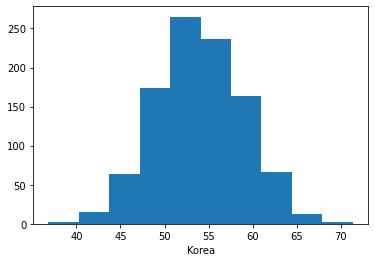

In [14]:
import matplotlib.pyplot as plt

plt.hist(meat_consumption_kr)
plt.xlabel('Korea')
plt.show()

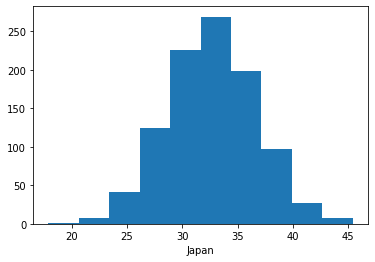

In [15]:
plt.hist(meat_consumption_jp)
plt.xlabel('Japan')
plt.show()

z-표준화

변수값에서 평균을 뺀 후 표준편차로 나누는 것

데이터 변환후 평균은 0, 표준편차는 1

(x-np.mean(x))/np.std(x) 또는 scipy패키지의 zscore() 또는 sckitlearn패키지의 preprocessing() 이용

In [16]:
#zscore() 이용

import scipy.stats as ss

meat_consumption['한국인_정규화'] = ss.zscore(meat_consumption_kr)
meat_consumption['일본인_정규화'] = ss.zscore(meat_consumption_jp)

meat_consumption.head()

,한국인,일본인,한국인_정규화,일본인_정규화
0,54.373118,25.020102,0.085586,-1.905479
1,54.908190,27.661643,0.193932,-1.247078
2,55.630334,34.261182,0.340157,0.397850
3,55.150045,34.538434,0.242904,0.466954
4,64.604013,37.917365,2.157212,1.309149


In [17]:
#np함수 이용

meat_consumption['한국인_정규화2'] = (meat_consumption_kr - np.mean(meat_consumption_kr))/np.std(meat_consumption_kr)
meat_consumption['일본인_정규화2'] = (meat_consumption_jp - np.mean(meat_consumption_jp))/np.std(meat_consumption_jp)

meat_consumption.head()

,한국인,일본인,한국인_정규화,일본인_정규화,한국인_정규화2,일본인_정규화2
0,54.373118,25.020102,0.085586,-1.905479,0.085586,-1.905479
1,54.908190,27.661643,0.193932,-1.247078,0.193932,-1.247078
2,55.630334,34.261182,0.340157,0.397850,0.340157,0.397850
3,55.150045,34.538434,0.242904,0.466954,0.242904,0.466954
4,64.604013,37.917365,2.157212,1.309149,2.157212,1.309149


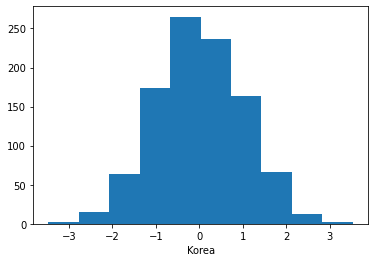

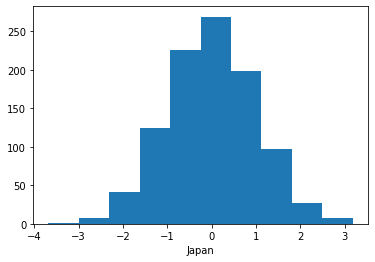

In [24]:
#표준화된 데이터에 대한 히스토그램

plt.hist(meat_consumption['학국인_정규화'])
plt.xlabel('Korea')
plt.show()

plt.hist(meat_consumption['일본인_정규화'])
plt.xlabel('Japan')
plt.show()

In [30]:
#사이킷런 스케일러 이용 정규화

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
meat_consumption['한국인_정규화3'] = scaler.fit_transform(meat_consumption[['한국인']])

print(meat_consumptio)

NameError: ignored

In [ ]:
cd /content/drive/MyDrive/BigData_Study/BigData_Exam

In [ ]:
!git config --global user.email 'dydwns9436@naver.com'
!git config --global user.name 'dydwns9436'

!git add Study_04.ipynb

!git commit -m '2022-06-08'
!git push